# Project - 2 (Machine Learning)

## i. Introduction

Nama    : Hafizal Shakur

**Problem:**

Indonesia sebagai negara yang memiliki keanekaragaman alam yang bermacam-macam menarik perhatian seluruh dunia untuk melakukan penjelajahan. Beberapa kegiatan penjelajahan membutuhkan persiapan yang matang, mulai dari kondisi fisik,  prakiraan medan dan cuaca, serta perbekalan. Tidak semua penjelajahan berjalan lancar. Ada saja kendala yang harus dihadapi, salah satunya kurang perbekalan. Sebagai makhluk hidup, kehabisan stok makanan di alam liar membuat manusia menunjukan insting naturalnya yaitu berburu. Selain itu tumbuhan dan jamur juga menjadi akses yang lebih mudah untuk dijadikan makanan. Akan tetapi tidak sembarang jamur boleh dikonsumsi oleh manusia. Ada yang bisa mengakibatkan gangguan sampai kematian apabila mengonsumsi jenis yang salah.

Beberapa spesies jamur yang biasa dikonsumsi bisa dibudidayakan. Biasanya spesies tersebut adalah jamur yang banyak diperjualbelikan sebagai bahan makananan. Selanjutnya ada juga jamur yang liar, yaitu jamur yang tidak diternak.Biasanya jarang ditemukan bahkan ada yang memiliki harga fantastis. Dari keanekaragaman spesies jamur tersebut, maka dibutuhkan ilmu yang bisa membedakan mana jamur yang tidak boleh dan boleh dijual serta dikonsumsi.

**Objective:**

Membuat prediksi dengan menggunakan beberapa model supervised ML sebagai perbandingan bertujuan untuk mengklasifikasi spesies jamur berdasarkan "p" = poisonous/ "e" = edible untuk menghindari potensi keracunan makanan disebabkan oleh jamur dengan mengacu pada atribut jamur tersebut.

## ii. Import Libraries

In [210]:
# import libraries
import pandas as pd

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
import phik
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

from sklearn.model_selection import RandomizedSearchCV

import pickle

## iii. Data Loading

Memuat dataset dari file csv ke dalam bentuk data frame.

In [211]:
# memuat data
ori = pd.read_csv(r"C:\Users\hafiz\OneDrive\Documents\Hacktiv8_Data_Science_Bootcamp\rmt_40\PHASE_1\p1-ftds040-rmt-m2-shakurhs\secondary_data.csv", delimiter=';')
ori

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


Berikut adalah gambaran secara keseluruhan data yang berhasil dimuat. Diketahui pada dimensi data terdapat 61609 baris data dan 21 kolom. Sekilas langsung saja nampak bahwa beberapa kolom pada dataset memiliki missing value, yang analisis lebih lanjutnya dilakukan pada sesi lain. Kemudian terlihat nama dari tiap kolom yang menggunakan tanda '-' bukan tanda '_' sebagai pembagi antar kata. Selain itu terlihat nilai pada tiap cell di dalam data set diwakilkan oleh inisial. Informasi inisial pada dataset yang telah saya dapatkan sebagai berikut.

Deskripsi:
- class: e = edible, p = poisonous/not edible
- cap-diameter: float number (cm)
- cap-shape: b = bell, c = conical, x = convex, f = flat, s = sunken, p = spherical, o = others.
- cap-surface: i = fibrous, g = grooves, y = scaly, s = smooth, h = shiny, l = leathery, k = silky, t = sticky, w = wrinkled, e = fleshy.
- cap-color: n = brown, b = buff, g = gray, r = green, p = pink, u = purple, e = red, w = white, y = yellow, l = blue , o = orange, k = black.
- does-bruise-bleed: yes = t, no = f.
- gill-attachment: a = adnate, x adnexed, d = decurrent, e = free, s = sinuate, p = pores, f = none.
- gill-spacing: c = close, d = distant, f = none.
- gill-color: n = brown, b = buff, g = gray, r = green, p = pink, u = purple, e = red, w = white, y = yellow, l = blue , o = orange, k = black, f = none.
- stem-height: float number (cm)
- stem-width: float number (cm)
- stem-root: b = bulbous, s = swollen, c = club, e = equal, z = rhizomorphs, r = rooted.
- stem-surface: i = fibrous, g = grooves, y = scaly, s = smooth, h = shiny, l = leathery, k = silky, t = sticky, w = wrinkled, e = fleshy, f = none.
- stem-color: n = brown, b = buff, g = gray, r = green, p = pink, u = purple, e = red, w = white, y = yellow, l = blue , o = orange, k = black, f = none.
- veil-type: p = partial, u = universal.
- veil-color: n = brown, b = buff, g = gray, r = green, p = pink, u = purple, e = red, w = white, y = yellow, l = blue , o = orange, k = black, f = none.
- has-ring: t = yes, f = no.
- ring-type: c = cobwebby, e = evanescent, r = flaring, g = grooved, l = large, p = pendant, s = sheating, z = zone, m = movable, f = none.
- spore-print-color:: n = brown, b = buff, g = gray, r = green, p = pink, u = purple, e = red, w = white, y = yellow, l = blue , o = orange, k = black, f = none.
- habitat: g = grasses, l = leaves, m = meadows, p = paths, h = heaths, u = urban, w = waste, d = woods.
- season: s = spring, u = summer, a = autumn, w = winter.


In [212]:
# mengganti '-' dengan '_'
ori.columns = [col.replace('-','_') for col in ori.columns]
ori.head()

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,...,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


Karena saya tidak biasa menggunakan simbol '-' (hypen) sebagai pemisah antarkata, maka saya menukarnya dengan '_' (underscore).

In [213]:
# menampilkan informasi data
ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap_diameter          61069 non-null  float64
 2   cap_shape             61069 non-null  object 
 3   cap_surface           46949 non-null  object 
 4   cap_color             61069 non-null  object 
 5   does_bruise_or_bleed  61069 non-null  object 
 6   gill_attachment       51185 non-null  object 
 7   gill_spacing          36006 non-null  object 
 8   gill_color            61069 non-null  object 
 9   stem_height           61069 non-null  float64
 10  stem_width            61069 non-null  float64
 11  stem_root             9531 non-null   object 
 12  stem_surface          22945 non-null  object 
 13  stem_color            61069 non-null  object 
 14  veil_type             3177 non-null   object 
 15  veil_color         

Setelah dimensi data diketahui sebelumnya, informasi lainnya yang bisa kita dapatkan adalah terlihat bahwa data type sudah sesuai dengan yang semestinya. Terdapat 18 kolom dengan data type object dan 3 kolom data type float. Keberadaan missing value pun semakin terlihat jelas mana saja kolom yang tidak lengkap tersebut.

In [214]:
# menduplikat data
df = ori.copy()

# mengganti inisial menjadi value yang lebih jelas
class_mapping = {'e': 'edible', 'p': 'poisonous'}
cap_shape_mapping = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 's': 'sunken', 'p': 'spherical', 'o': 'others'}
cap_surface_mapping = {'i': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth', 'h': 'shiny', 'l': 'leathery', 'k': 'silky', 't': 'sticky', 'w': 'wrinkled', 'e': 'fleshy', 'd': 'dry'}
cap_color_mapping = {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black'}
does_bruise_or_bleed_mapping = {'t': 'yes', 'f': 'no'}
gill_attachment_mapping = {'a': 'adnate', 'x': 'adnexed', 'd': 'decurrent', 'e': 'free', 's': 'sinuate', 'p': 'pores', 'f': 'none'}
gill_spacing_mapping = {'c': 'close', 'd': 'distant', 'f': 'none'}
gill_color_mapping = {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black', 'f': 'none'}
stem_root_mapping = {'b': 'bulbous', 's': 'swollen', 'c': 'club', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted'}
stem_surface_mapping = {'i': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth', 'h': 'shiny', 'l': 'leathery', 'k': 'silky', 't': 'sticky', 'w': 'wrinkled', 'e': 'fleshy', 'f': 'none'}
stem_color_mapping = {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black', 'f': 'none'}
veil_type_mapping = {'p': 'partial', 'u': 'universal'}
veil_color_mapping = {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black', 'f': 'none'}
has_ring_mapping = {'t': 'yes', 'f': 'no'}
ring_type_mapping = {'c': 'cobwebby', 'e': 'evanescent', 'r': 'flaring', 'g': 'grooved', 'l': 'large', 'p': 'pendant', 's': 'sheathing', 'z': 'zone', 'm': 'movable', 'f': 'none'}
spore_print_color_mapping = {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black', 'f': 'none'}
habitat_mapping = {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'h': 'heaths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
season_mapping = {'s': 'spring', 'u': 'summer', 'a': 'autumn', 'w': 'winter'}

# Apply the mappings to the respective columns
df['class'] = df['class'].replace(class_mapping)
df['cap_shape'] = df['cap_shape'].replace(cap_shape_mapping)
df['cap_surface'] = df['cap_surface'].replace(cap_surface_mapping)
df['cap_color'] = df['cap_color'].replace(cap_color_mapping)
df['does_bruise_or_bleed'] = df['does_bruise_or_bleed'].replace(does_bruise_or_bleed_mapping)
df['gill_attachment'] = df['gill_attachment'].replace(gill_attachment_mapping)
df['gill_spacing'] = df['gill_spacing'].replace(gill_spacing_mapping)
df['gill_color'] = df['gill_color'].replace(gill_color_mapping)
df['stem_root'] = df['stem_root'].replace(stem_root_mapping)
df['stem_surface'] = df['stem_surface'].replace(stem_surface_mapping)
df['stem_color'] = df['stem_color'].replace(stem_color_mapping)
df['veil_type'] = df['veil_type'].replace(veil_type_mapping)
df['veil_color'] = df['veil_color'].replace(veil_color_mapping)
df['has_ring'] = df['has_ring'].replace(has_ring_mapping)
df['ring_type'] = df['ring_type'].replace(ring_type_mapping)
df['spore_print_color'] = df['spore_print_color'].replace(spore_print_color_mapping)
df['habitat'] = df['habitat'].replace(habitat_mapping)
df['season'] = df['season'].replace(season_mapping)
df.head()

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,...,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
0,poisonous,15.26,convex,grooves,orange,no,free,NaN,white,16.95,...,swollen,scaly,white,universal,white,yes,grooved,NaN,woods,winter
1,poisonous,16.60,convex,grooves,orange,no,free,NaN,white,17.99,...,swollen,scaly,white,universal,white,yes,grooved,NaN,woods,summer
2,poisonous,14.07,convex,grooves,orange,no,free,NaN,white,17.80,...,swollen,scaly,white,universal,white,yes,grooved,NaN,woods,winter
3,poisonous,14.17,flat,shiny,red,no,free,NaN,white,15.77,...,swollen,scaly,white,universal,white,yes,pendant,NaN,woods,winter
4,poisonous,14.64,convex,shiny,orange,no,free,NaN,white,16.53,...,swollen,scaly,white,universal,white,yes,pendant,NaN,woods,winter


Pada code di atas saya melakukan duplikasi data dari dataset original sehingga segala perubahan tidak berdampak pada data original. Kemudian saya juga mengganti value pada tiap cell yang sebelumnya menggunakan insial, diganti menjadi kata. Itu bertujuan untuk, memudahkan dalam membaca dan juga menuliskan value. Proses selanjutnya yang akan dilakukan adalah menghapus data yang terduplikat untuk menghindari model Machine Learing mempelajari data yang sama.

In [215]:
# menghapus data yang terduplikat
print(f'Data yang terduplikat berjumlah: {df.duplicated().sum()} data')
df = df.drop_duplicates()
print(f'Sisa data terduplikat: {df.duplicated().sum()}')
print(f'Dimensi data baru {df.shape}')

Data yang terduplikat berjumlah: 146 data
Sisa data terduplikat: 0
Dimensi data baru (60923, 21)


## iv. Exploratory Data Analysis (EDA)

#### 1. Persebaran Data pada Categorical Columns

Tujuan dari melihat EDA ini adalah untuk melihat bagaimana nilai dari tiap variabel terbagi, salah satunya kita bisa menentukan apakah setiap kolom termasuk ke dalamn kategori balanced atau imbalanced. Data yang imbalanced, terutama pada target, sebaiknya dilakukan data balancing agar membantu model dalam proses belajar.

In [216]:
# menentukan kolom categorical
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color',
       'does_bruise_or_bleed', 'gill_attachment', 'gill_spacing', 'gill_color',
       'stem_root', 'stem_surface', 'stem_color', 'veil_type', 'veil_color',
       'has_ring', 'ring_type', 'spore_print_color', 'habitat', 'season'],
      dtype='object')

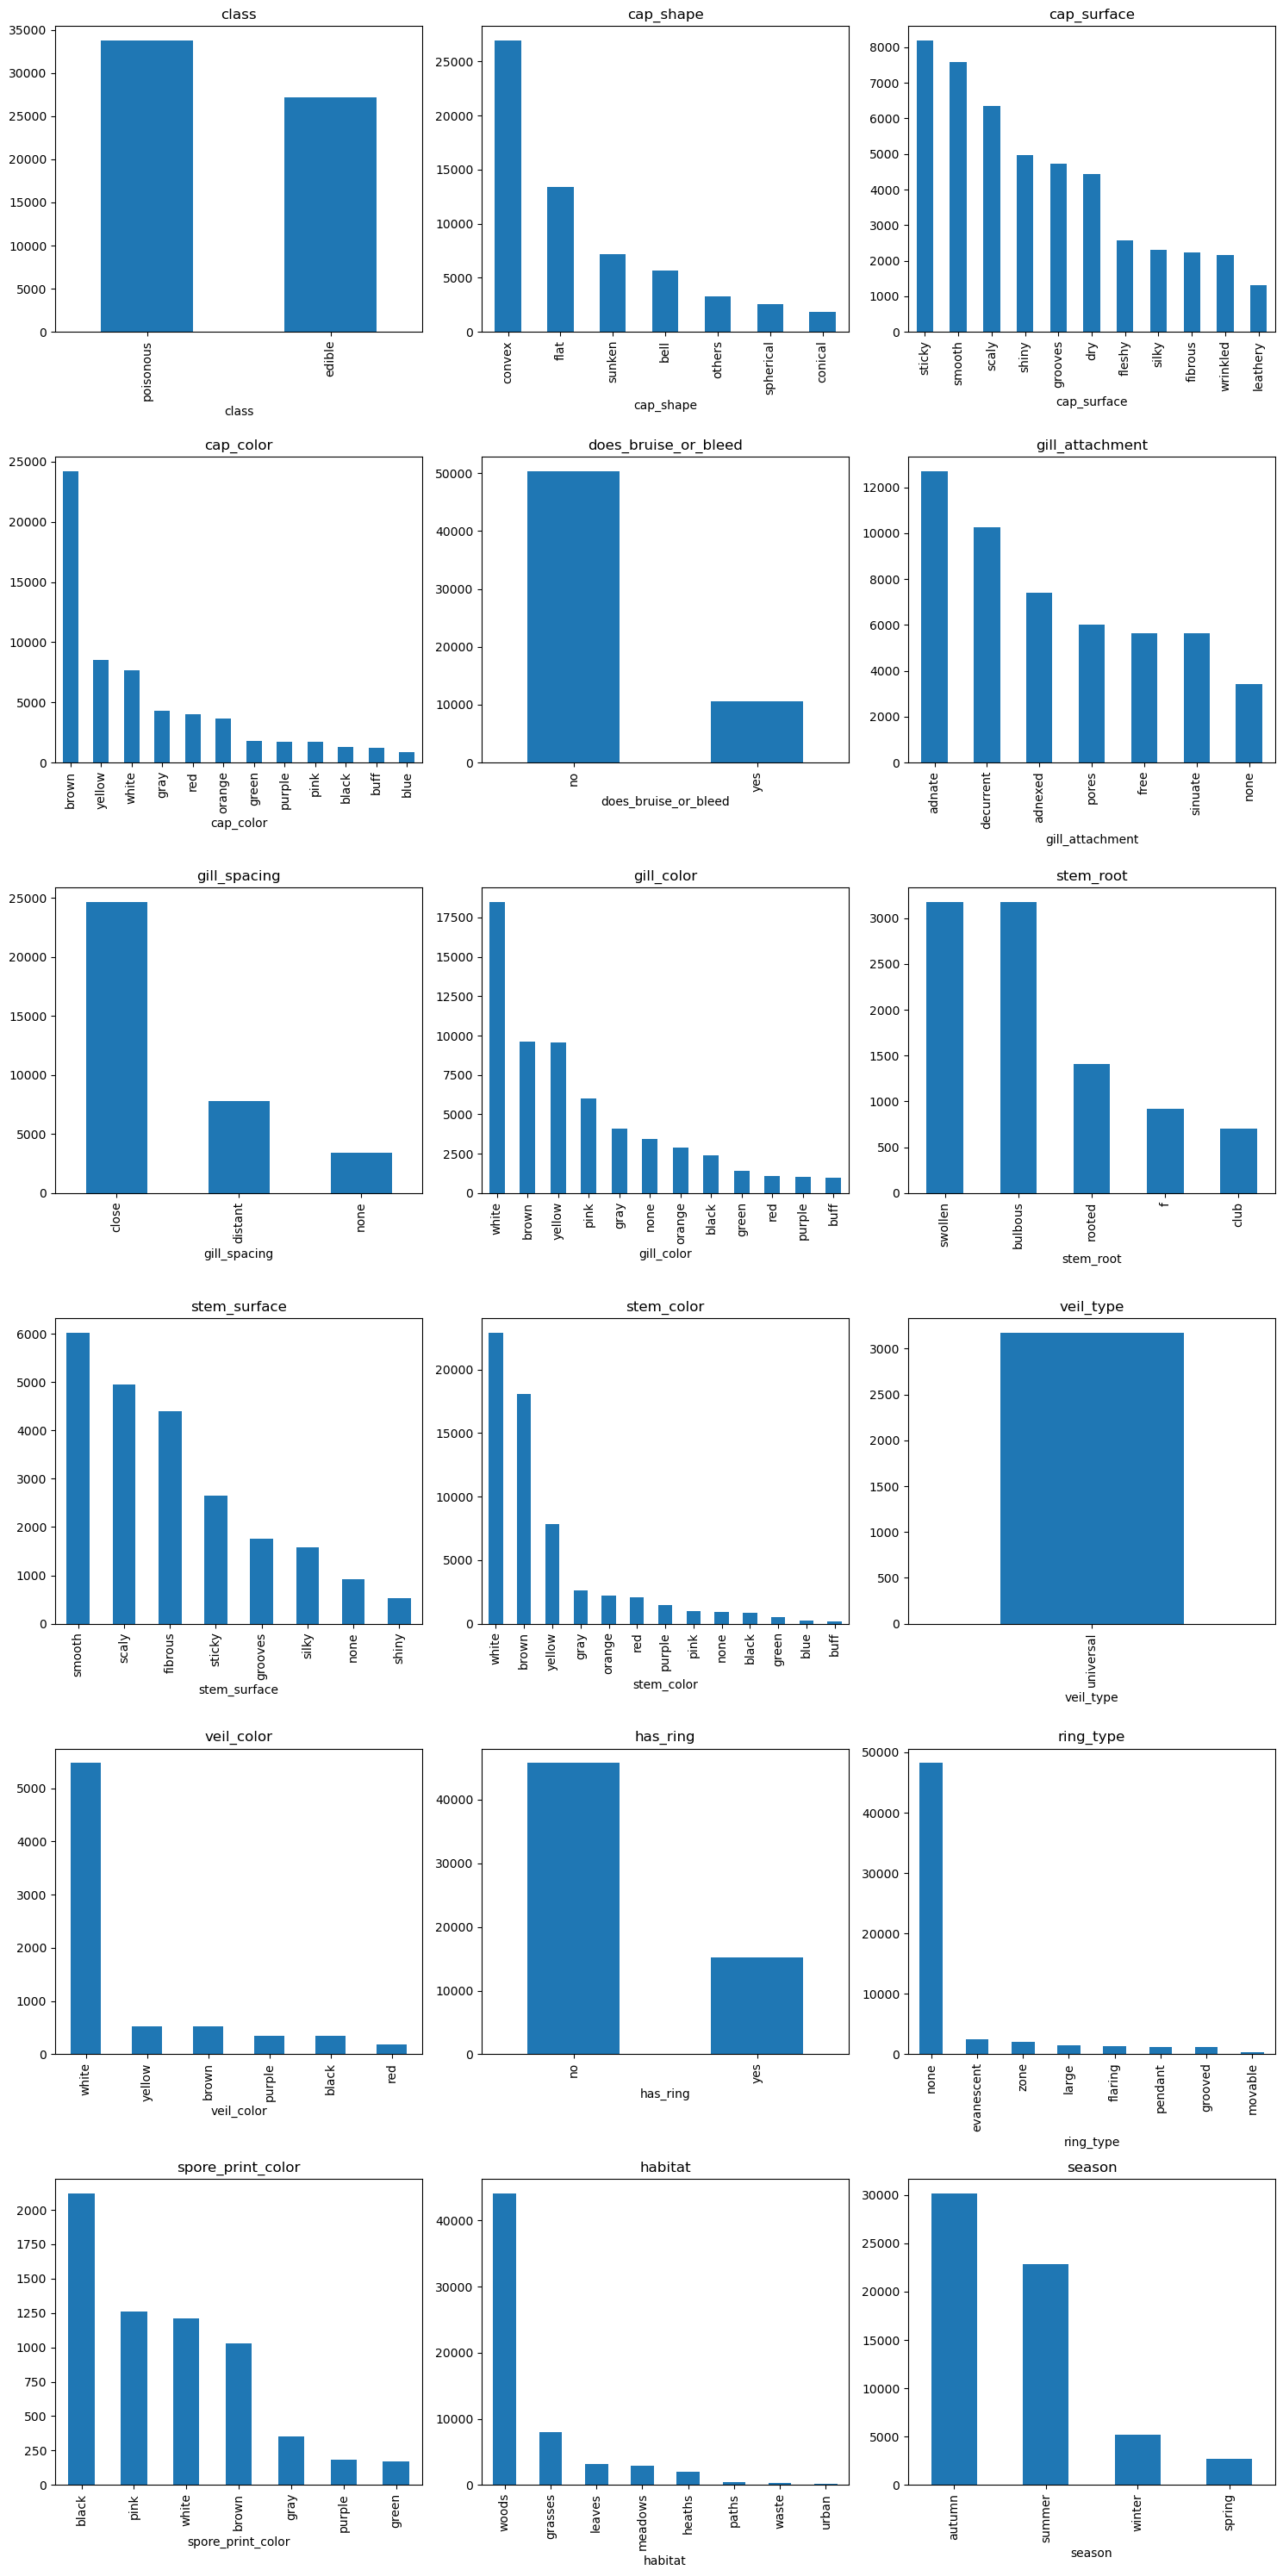

In [217]:
# membuat subplot sesuai jumlah fitur
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 30))
axes = axes.flatten()

# melakukan looping untuk membuat plot tiap fitur
for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Setelah dibuatkan plot pada tiap variabel, dapat dilihat mayoritas data berbentuk imbalanced. Namun perlu diketahui, data pada variabel yang akan dijadikan target, yakni kolom `class`, terlihat datanya termasuk balanced dengan melihat secara sepintas pada bar chart. Akan tetapi, dari semua variabel di atas keanehan terjadi pada kolom `veil_type` dimana seharusnya kolom tersebut memiliki lebih dari satu value yang berbeda, hanya saja karena kolom tersebut memiliki missing value maka grafik di atas hanya menunjukkan satu nilai.

#### 2. Pembuktian Korelasi Kepemilikan "Ring" pada Spesies dengan `class`

Mari mebuat asumsi hipotesis sebagai berikut:

-H0: Tidak terdapat korelasi antara kepimilikan ring dengan `class`.

-H1: Terdapat korelasi antara kepimilikan ring dengan `class`.

Hipotesis tersebut akan dibuktikan mengggunakan metode Chi Squarred karena kedua variabel berbentuk categorical.

In [218]:
# membuat pivot table
ctab = pd.crosstab(df['has_ring'], df['class'])
ctab

class,edible,poisonous
has_ring,,
no,21180,24576
yes,6001,9166


In [219]:
# menghitung korelasi menggunakan chi squared
result = stats.chi2_contingency(ctab)
print('P-Value: ', result.pvalue)

P-Value:  3.602349511272356e-47


Diketahui bahwa nilai p-value pada hasil perhitungan menggunakan Chi-Squared lebih kecil dari critical value (<0.05) yang artinya hipotesis berhail untuk menolak H0 dan mengutamakan hipotesis alternatif (H1).

#### 3. Statistika Deskriptif Variabel Numerical (Mean)

In [220]:
# membuat fungsi untuk menentukan nilai rata-rata
def mean_def(table, col):
    mean_table = table[col].mean()

    print(f'Nilai rata-rata kolom {col} adalah: {mean_table}')

In [221]:
mean_def(df, 'cap_diameter')
mean_def(df, 'stem_height')
mean_def(df, 'stem_width')

Nilai rata-rata kolom cap_diameter adalah: 6.741957224693466
Nilai rata-rata kolom stem_height adalah: 6.597201713638526
Nilai rata-rata kolom stem_width adalah: 12.17848382384321


#### 4. Statistika Deskriptif Variabel Numerical (Median)

In [222]:
# membuat fungsi untuk menentukan nilai median
def median_def(table, col):
    median_table = table[col].median()

    print(f'Nilai median kolom {col} adalah: {median_table}')

In [223]:
median_def(df, 'cap_diameter')
median_def(df, 'stem_height')
median_def(df, 'stem_width')

Nilai median kolom cap_diameter adalah: 5.88
Nilai median kolom stem_height adalah: 5.96
Nilai median kolom stem_width adalah: 10.22


#### 5. Menampilkan Histogram Statistika Deskriptif

In [224]:
# membuat fungsi histogram
def stat_hist(table, col): 
    sns.histplot(table[col], bins=30, kde=False, edgecolor='black')
    plt.axvline(x = table[col].median(), color='yellow', label = 'Median')
    plt.axvline(x = table[col].mean(), color = 'red', label = 'Mean')
    plt.xlabel('Size in (cm)')
    plt.grid(True)
    plt.legend()
    plt.show

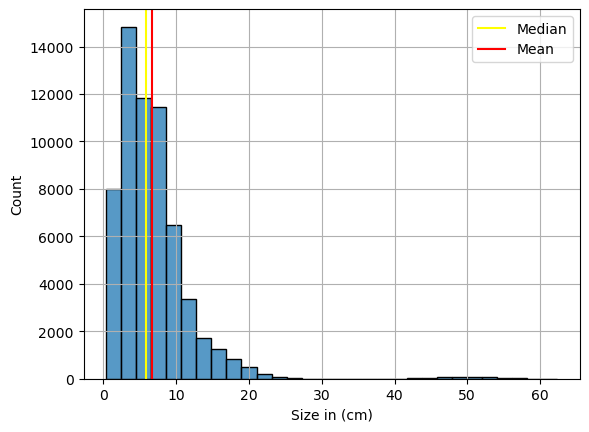

In [225]:
# histogram cap_diameter
stat_hist(df, 'cap_diameter')

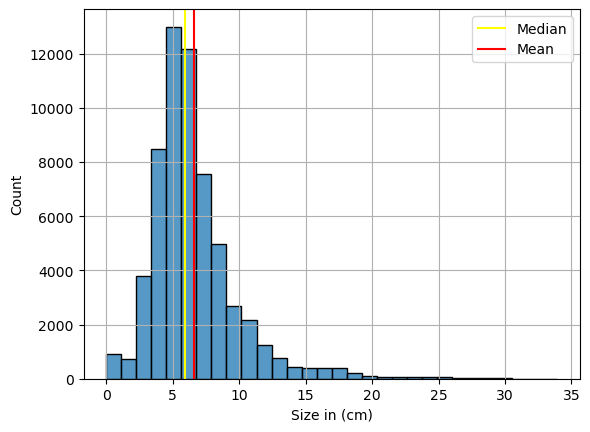

In [226]:
# histogram stem_height
stat_hist(df, 'stem_height')

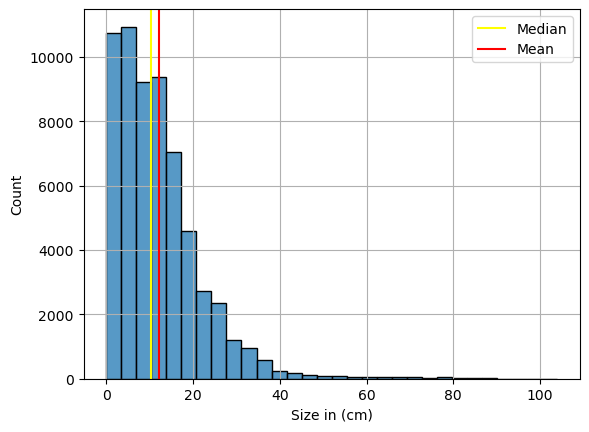

In [227]:
# histogram stem_width
stat_hist(df, 'stem_width')

Visualisasi ketiga variabel di atas menggambarkan bahwa ketiganya memiliki distribusi data skew dengan cara melihat garis median dan mean pada histogram memiliki jarak antar keduanya.

#### 6. Menentukan Korelasi antara `stem_width` dan `stem_height`

Selanjutnya EDA yang akan dilakukan adalah melihat korelasi antara `stem_width` dan `stem_height`. Variabel `stem_width` dan `stem_height` menjelaskan tentang ukuran batang pada jamur secara diameter dan tinggi karena diketahui tiap spesies memiliki ukuran yang berbeda-beda. Biasanya, ukuran batang pada jamur memiliki keterkaitan. Seperti yang kita tahu, batang yang memiliki diameter besar biasanya digunakan untuk menopang ukuran yang lebih tinggi. Untuk membuktikan hal tersebut, maka akan dilihat korelasi antara keduanya.

In [228]:
# membuat fungsi untuk memeriksa skewness
def skewness_check(table, col):
    skew = table[col].skew()
    prompt = 'terdistribusi skew' if skew >= 0.5 else 'terdistribus normal'
    print(f'Skewness score kolom {col}: {skew} {prompt}')

In [229]:
# menerapkan fungsi untuk memeriksa skewness
skewness_check(df, 'stem_width')
skewness_check(df, 'stem_height')

Skewness score kolom stem_width: 2.169325068972333 terdistribusi skew
Skewness score kolom stem_height: 2.0500128021507154 terdistribusi skew


Tujuan dari mnegetahui skewness dari sebuah variabel sebelum menghitung korelasi adalah untuk melihat metode korelasi apa yang paling tepat. Dalam kasus ini, diketahui kedua kolom `stem_width` dan `stem_height` terdistribusi skew. Dengan begitu, metode yang paling tepat untuk menghitung korelasi keduanya adalah dengan Spearman Correlation.

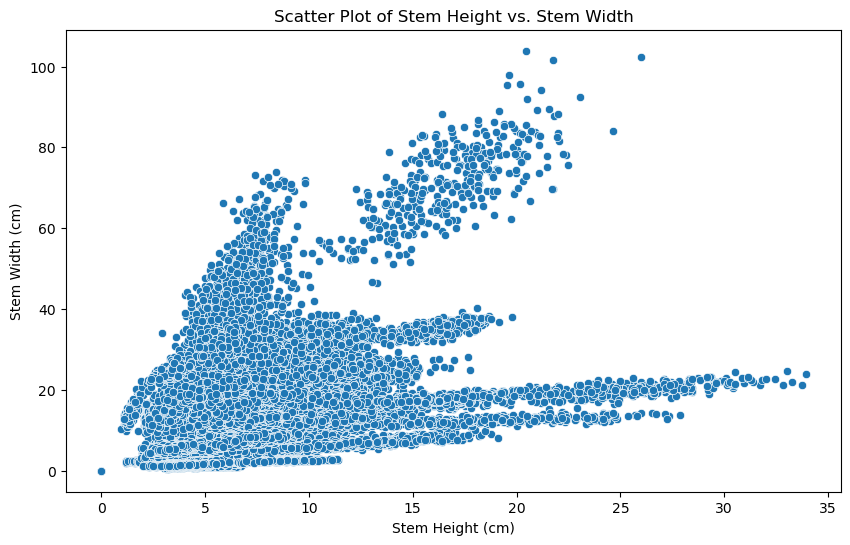

Nilai correlation coefficient:
             stem_height  stem_width
stem_height     1.000000    0.497687
stem_width      0.497687    1.000000


In [230]:
# menghitung korelasi spearman
corr_rho = df[['stem_height', 'stem_width']].corr(method='spearman')

# membuat plot korelasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='stem_height', y='stem_width')
plt.title('Scatter Plot of Stem Height vs. Stem Width')
plt.xlabel('Stem Height (cm)')
plt.ylabel('Stem Width (cm)')
plt.show()
print('Nilai correlation coefficient:')
print(corr_rho)

Hasil perhitungan korelasi Spearman menunujukkan bahwa kedua variabel memiliki korelasi yang medium. Nilai coefficient korelasi sebesar 0.497687 belum bisa dikatakan sebagai korelasi yang kuat tetapi sudah bisa membuktikan bahwa terdapat korelasi antara variabel `stem_width` dan `stem_height`.

#### 7. Menghitung Korelasi antara Kolom Feature dengan Kolom Target `class`

Perhitungan korelasi tidak bisa dilakukan ketika terdapat missing value pada kolom features. Untuk itu, saya akan melakukan imputasi sementara agar bisa menjalankan komputasi perhitungan korelasi menggunakan phi_k Correlation.

In [231]:
# membuat fungsi imputasi missing value
def mode_NA(table, col):
    mode = table[col].mode()[0]
    imputer = table[col].fillna(mode, inplace=True)

    return imputer

In [232]:
# menduplikasi data
data = df.copy()

# menampilkan missing value
data.isna().sum()

class                       0
cap_diameter                0
cap_shape                   0
cap_surface             14120
cap_color                   0
does_bruise_or_bleed        0
gill_attachment          9855
gill_spacing            25062
gill_color                  0
stem_height                 0
stem_width                  0
stem_root               51536
stem_surface            38122
stem_color                  0
veil_type               57746
veil_color              53510
has_ring                    0
ring_type                2471
spore_print_color       54597
habitat                     0
season                      0
dtype: int64

In [233]:
# imputasi missing value
mode_NA(data, 'cap_surface')
mode_NA(data, 'spore_print_color')
mode_NA(data, 'gill_attachment')
mode_NA(data, 'gill_spacing')
mode_NA(data, 'stem_root')
mode_NA(data, 'stem_surface')
mode_NA(data, 'veil_type')
mode_NA(data, 'veil_color')
mode_NA(data, 'ring_type')
data.isna().sum()


C:\Users\hafiz\AppData\Local\Temp\ipykernel_197380\1518954111.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  imputer = table[col].fillna(mode, inplace=True)


class                   0
cap_diameter            0
cap_shape               0
cap_surface             0
cap_color               0
does_bruise_or_bleed    0
gill_attachment         0
gill_spacing            0
gill_color              0
stem_height             0
stem_width              0
stem_root               0
stem_surface            0
stem_color              0
veil_type               0
veil_color              0
has_ring                0
ring_type               0
spore_print_color       0
habitat                 0
season                  0
dtype: int64

In [234]:
# membuat fungsi untuk mengecek korelasi
def phik_matrix(df, target):
    correlation_matrix = df.phik_matrix()
    corr_matrix = correlation_matrix[target]

    return corr_matrix

In [235]:
# menghitung korelasi dengan phi_k correlation
phik_matrix(data, 'class')

interval columns not set, guessing: ['cap_diameter', 'stem_height', 'stem_width']


c:\Users\hafiz\anaconda3\Lib\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable veil_type for analysis 1. Dropping this column
  warnings.warn(


class                   1.000000
cap_diameter            0.167305
cap_shape               0.176332
cap_surface             0.226326
cap_color               0.311657
does_bruise_or_bleed    0.028970
gill_attachment         0.209339
gill_spacing            0.067137
gill_color              0.246535
stem_height             0.262705
stem_width              0.295428
stem_root               0.168159
stem_surface            0.329055
stem_color              0.289549
veil_color              0.238599
has_ring                0.091452
ring_type               0.264532
spore_print_color       0.160348
habitat                 0.235628
season                  0.179682
Name: class, dtype: float64

Hasil dari perhitungan menggunakan phi_k corrleation bisa dikatakan bahwa setiap fitur memiliki korelasi terhadap target `class` walaupun bisa dikatakan korelasinya bervariasi dari korelasi medium hingga korelasi lemah dan tidak terdapat korelasi yang kuat (>= 0.5).

## v. Feature Engineering

#### Cardinality Check

In [236]:
# menampilkan jumlah unique value pada kolom categorical
for i in categorical_columns:
    print(f'Jumlah unique value pada kolom {i}: {df[i].nunique()}')

Jumlah unique value pada kolom class: 2
Jumlah unique value pada kolom cap_shape: 7
Jumlah unique value pada kolom cap_surface: 11
Jumlah unique value pada kolom cap_color: 12
Jumlah unique value pada kolom does_bruise_or_bleed: 2
Jumlah unique value pada kolom gill_attachment: 7
Jumlah unique value pada kolom gill_spacing: 3
Jumlah unique value pada kolom gill_color: 12
Jumlah unique value pada kolom stem_root: 5
Jumlah unique value pada kolom stem_surface: 8
Jumlah unique value pada kolom stem_color: 13
Jumlah unique value pada kolom veil_type: 1
Jumlah unique value pada kolom veil_color: 6
Jumlah unique value pada kolom has_ring: 2
Jumlah unique value pada kolom ring_type: 8
Jumlah unique value pada kolom spore_print_color: 7
Jumlah unique value pada kolom habitat: 8
Jumlah unique value pada kolom season: 4


Terlihat dari hasil yang ditampilkan, jumlah unique value paling tinggi terdapat di kolom `stem_color`, yaitu sebanyak 13 unique value. Namun setelah melihat dari keseluruhan jumlah data sebanyak kurang lebih 60,000 data, saya memutuskan tidak melakukan tindakan apapun terhadap kolom tersebut karena saya mengasumsikan 13 unique value bukan termasuk ke dalam high cardinality jika dibandingkan dengan total keseluruhan jumlah data.

#### Train - Test Split

In [237]:
# membagi varibel menjadi kolom fitur dan target
X = df.drop(columns='class')
y = df['class']

Karena model yang akan digunakan adalah untuk memprediksi apakah sebuah jamur dapat dikonsumsi atau tidak, maka kolom `class` akan dijadikan target, sedangkan kolom lainnya mejadi fitur-fitur. Setelah membagi kolom menjadi fitur dan target, selanjutnya membagi dataset menjadi train dan test set.

In [238]:
# split train dan test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, # spliting train dan test set dengan rasio 80:20
                                                    random_state=11)  # shuffling data
print(f'Train size : {X_train.shape}')
print(f'Test size : {X_test.shape}')

Train size : (48738, 20)
Test size : (12185, 20)


#### Handling Missing Value

In [239]:
# memriksa missing value pada train set
X_train.isna().mean()

cap_diameter            0.000000
cap_shape               0.000000
cap_surface             0.231996
cap_color               0.000000
does_bruise_or_bleed    0.000000
gill_attachment         0.161824
gill_spacing            0.410091
gill_color              0.000000
stem_height             0.000000
stem_width              0.000000
stem_root               0.845275
stem_surface            0.625898
stem_color              0.000000
veil_type               0.947823
veil_color              0.878021
has_ring                0.000000
ring_type               0.040584
spore_print_color       0.896118
habitat                 0.000000
season                  0.000000
dtype: float64

In [240]:
# memriksa missing value pada test set
X_test.isna().mean()

cap_diameter            0.000000
cap_shape               0.000000
cap_surface             0.230858
cap_color               0.000000
does_bruise_or_bleed    0.000000
gill_attachment         0.161510
gill_spacing            0.416496
gill_color              0.000000
stem_height             0.000000
stem_width              0.000000
stem_root               0.848502
stem_surface            0.625113
stem_color              0.000000
veil_type               0.947969
veil_color              0.879524
has_ring                0.000000
ring_type               0.040460
spore_print_color       0.896348
habitat                 0.000000
season                  0.000000
dtype: float64

Dari eksplorasi yang saya lakukan pada dataset, ditemukan bahwa missing value yang terdapat pada semua variabel termasuk dalam kategori MCAR karena saya tidak menemukan adanya pola pada missing value yang memungkinkan ditemukannya missing value MAR. Maka dari itu, metode yang tepat dan paling mudahnya untuk mengisi nilai missing value pada kolom categorical dengan menggunakan nilai modus. Akan tetapi dalam kasus ini terdapat beberapa kolom yang memiliki missing value lebih dari 80% total data. Akhirnya saya memutuskan untuk melakukan drop terhadap kolom-kolom tersebut karena apabila nilainya diisi oleh modus, akan mengurangi validitas data.

In [241]:
# drop kolom dengan misval lebih dari 80 %
X_train = X_train.drop(columns= ['stem_root', 'stem_surface', 'veil_type', 'veil_color', 'spore_print_color'])
X_test = X_test.drop(columns= ['stem_root', 'stem_surface', 'veil_type', 'veil_color', 'spore_print_color'])

In [242]:
X_train.isna().mean()

cap_diameter            0.000000
cap_shape               0.000000
cap_surface             0.231996
cap_color               0.000000
does_bruise_or_bleed    0.000000
gill_attachment         0.161824
gill_spacing            0.410091
gill_color              0.000000
stem_height             0.000000
stem_width              0.000000
stem_color              0.000000
has_ring                0.000000
ring_type               0.040584
habitat                 0.000000
season                  0.000000
dtype: float64

In [243]:
X_test.isna().mean()

cap_diameter            0.000000
cap_shape               0.000000
cap_surface             0.230858
cap_color               0.000000
does_bruise_or_bleed    0.000000
gill_attachment         0.161510
gill_spacing            0.416496
gill_color              0.000000
stem_height             0.000000
stem_width              0.000000
stem_color              0.000000
has_ring                0.000000
ring_type               0.040460
habitat                 0.000000
season                  0.000000
dtype: float64

In [244]:
# imputasi missing value menggunakan mode dengan simple imputer
misval_col_train = X_train.columns[X_train.isnull().any()].tolist()
mode_imputer = SimpleImputer(strategy='most_frequent')
X_train[misval_col_train] = mode_imputer.fit_transform(X_train[misval_col_train])
X_test[misval_col_train] = mode_imputer.transform(X_test[misval_col_train])

In [245]:
# memeriksa kembali terhadap missing value
X_train.isna().sum().sum()

0

In [246]:
X_test.isna().sum().sum()

0

Terlihat sudah masalah missing value sudah teratasi. Selanjutnya adalah menghandle outliers pada dataset.

#### Handling Outliers

In [247]:
# mengelompokan tabel continuous dalam variabel
num = X_train.select_dtypes(include='float64').columns
num

Index(['cap_diameter', 'stem_height', 'stem_width'], dtype='object')

In [248]:
# memeriksa skewness pada kolom continuous
skewness_check(X_train, 'cap_diameter')
skewness_check(X_train, 'stem_height')
skewness_check(X_train, 'stem_width')

Skewness score kolom cap_diameter: 3.816187043535628 terdistribusi skew
Skewness score kolom stem_height: 2.038352387836227 terdistribusi skew
Skewness score kolom stem_width: 2.155342943096152 terdistribusi skew


Skewness score ketiga kolom menunjukan bahwa kolom `cap_diameter`, `stem_height`, `stem_width` terdistribusi skew extreme. Menentukan outliers pada data dengan skewness exteme akan menggunakan metode Tukey's Rule dengan distance 3 yang akan dibuatkan fugnsi di bawah.

In [249]:
#  membuat fungsi tukeys rule
def find_skewed_boundaries(df, col, distance):
    for var in col:
        IQR = df[var].quantile(0.75) - df[var].quantile(0.25)

        low_bound = df[var].quantile(0.25) - (IQR * distance)
        up_bound = df[var].quantile(0.75) + (IQR * distance)

        outliers = df[(df[var] < low_bound) |( df[var] > up_bound)]
        percentage = len(outliers)/len(df) * 100

        print(f'Jumlah Outliers pada kolom {var}: {len(outliers)} dengan persentase {percentage:.2f}%')


In [250]:
# menentukan outliers dengan distance 3
find_skewed_boundaries(X_train, num, 3)

Jumlah Outliers pada kolom cap_diameter: 350 dengan persentase 0.72%
Jumlah Outliers pada kolom stem_height: 895 dengan persentase 1.84%
Jumlah Outliers pada kolom stem_width: 417 dengan persentase 0.86%


In [251]:
find_skewed_boundaries(X_test, num, 3)

Jumlah Outliers pada kolom cap_diameter: 91 dengan persentase 0.75%
Jumlah Outliers pada kolom stem_height: 215 dengan persentase 1.76%
Jumlah Outliers pada kolom stem_width: 127 dengan persentase 1.04%


Jumlah outliers beserta persentasenya terhadap keseluruhan data berhasil ditemukan. Metode yang akan saya gunakan untuk mengatasi masalah tersebut, saya menggunakan bantuan dari winsorizer. Kemudian akan dilakukan visualisasi menggunakan plot histogram dan box untuk melihat perbandingan variabel yang belum dilakukan handling outliers dan sudah.

In [252]:
# fungsi untuk menampilkan perbandingan data dengan/tanpa dilakukan handling outliers
def diagnostic_plots(df, variable):
    # menentukan ukuran figure
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()


Sebelum Capping (X_train) - cap_diameter


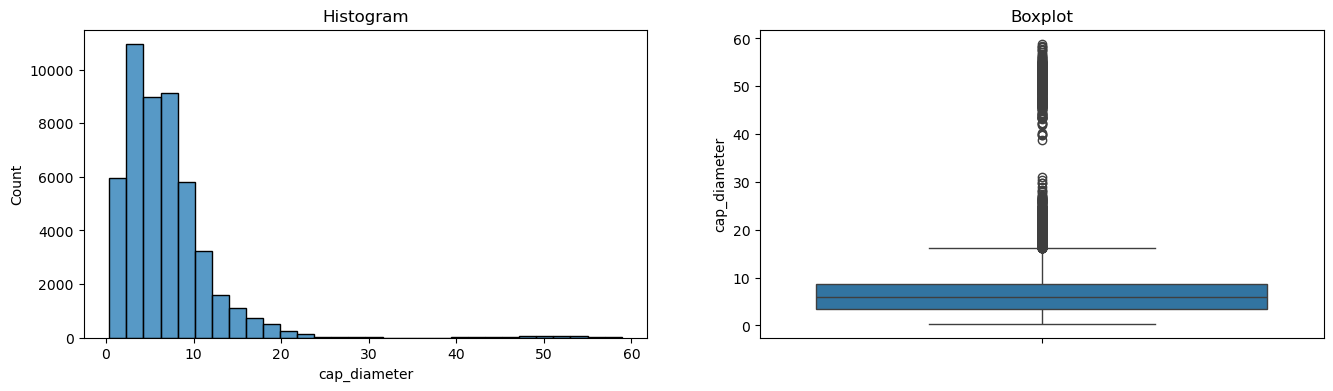


Setelah Capping (X_train) - cap_diameter


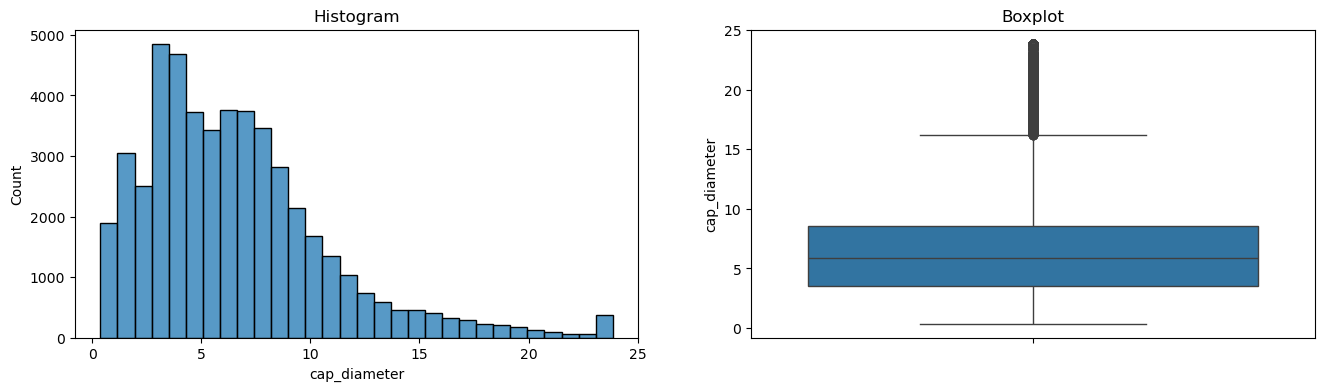


Sebelum Capping (X_train) - stem_height


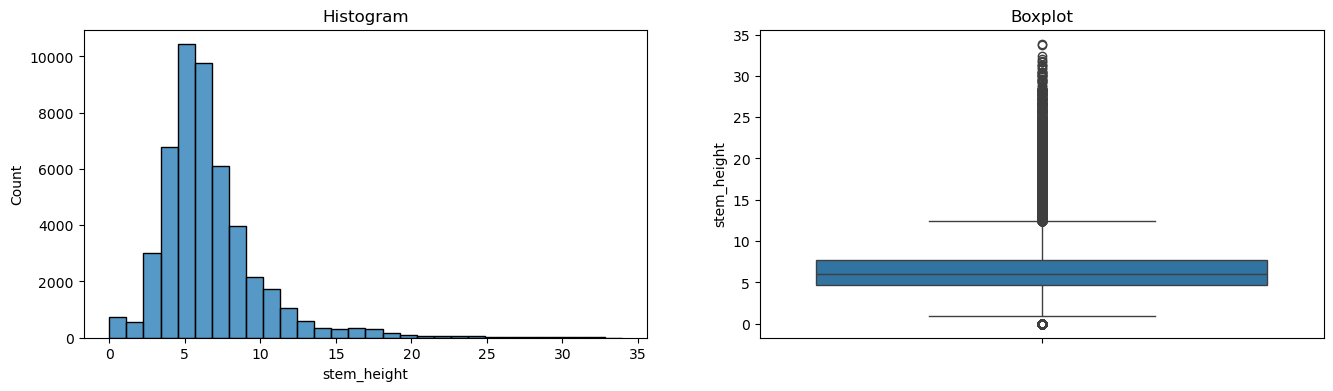


Setelah Capping (X_train) - stem_height


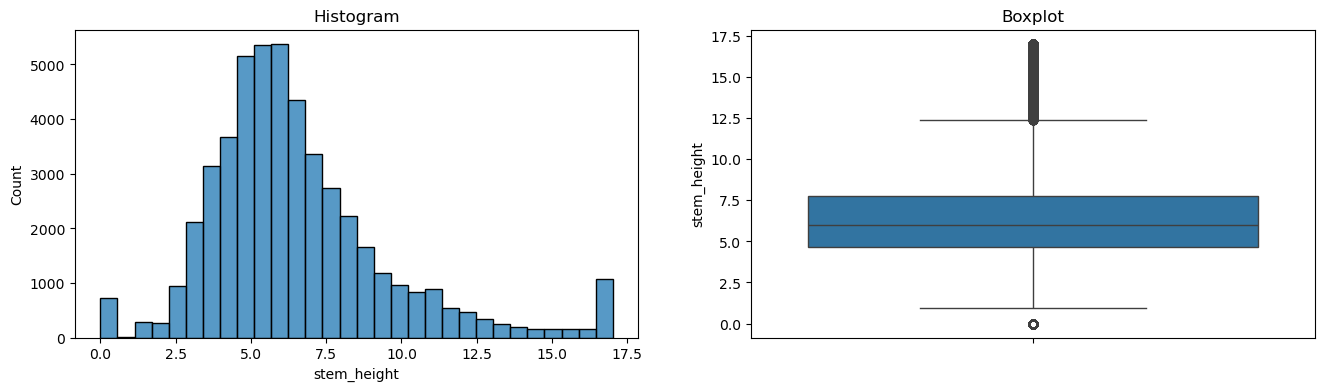


Sebelum Capping (X_train) - stem_width


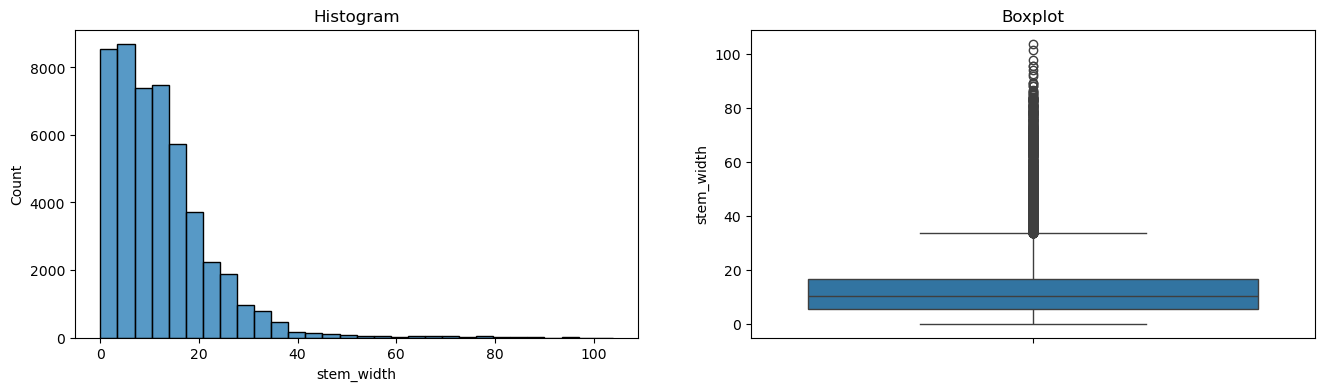


Setelah Capping (X_train) - stem_width


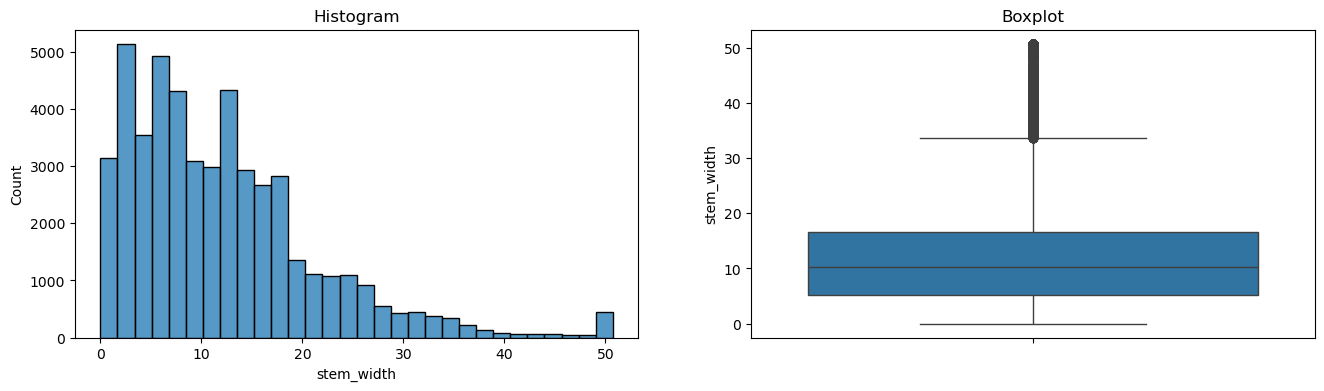

In [253]:
X_train_capped = X_train.copy()
X_test_capped = X_test.copy()
for i in num:
        
    # metode untuk kolom dengan distribusi skew
    winsorizer = Winsorizer(capping_method='iqr',
                        tail='both',
                        fold=3,
                        variables=[i],
                        )
        # menerapkan dan menyimpan data yang sudah diproses  
    X_train_capped[i] = winsorizer.fit_transform(X_train_capped[[i]])
    X_test_capped[i] = winsorizer.transform(X_test_capped[[i]])

    # manmpilkan grafik perbandingan
    print(f'\nSebelum Capping (X_train) - {i}')
    diagnostic_plots(X_train, i)
    print(f'\nSetelah Capping (X_train) - {i}')
    diagnostic_plots(X_train_capped, i)

Plot di atas menunjukkan perubahan bentuk pada kolom yang belum dan sudan dilakukan handling outliers menggunakan winsorizer, artinya proses outliers handling berhasil dan siap untuk ke tahap selanjutnya.

#### Feature Selection

In [254]:
# menggabukan kolom-koloom fitur dengan kolom target
concat = pd.concat([X_train_capped, y_train], axis = 1)
concat.head()

,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem_width,stem_color,has_ring,ring_type,habitat,season,class
23556,3.59,flat,sticky,purple,no,adnate,close,white,4.52,7.26,white,no,none,woods,summer,poisonous
18458,9.77,flat,scaly,yellow,no,sinuate,close,yellow,7.49,15.75,red,no,none,woods,autumn,poisonous
15468,8.87,convex,scaly,brown,no,adnate,close,white,6.65,25.01,brown,yes,evanescent,woods,autumn,edible
19980,5.72,bell,fibrous,red,no,free,close,black,7.17,7.50,yellow,no,none,grasses,summer,poisonous
31972,3.02,convex,silky,brown,no,sinuate,close,pink,3.95,2.74,brown,no,none,grasses,summer,poisonous


In [ ]:
concat.columns

Index(['cap_diameter', 'cap_shape', 'cap_surface', 'cap_color',
       'does_bruise_or_bleed', 'gill_attachment', 'gill_spacing', 'gill_color',
       'stem_height', 'stem_width', 'stem_color', 'has_ring', 'ring_type',
       'habitat', 'season', 'class'],
      dtype='object')

In [ ]:
# membuat fungsi untuk mengecek korelasi
def phik_matrix(df, target):
    correlation_matrix = df.phik_matrix()
    corr_matrix = correlation_matrix[target]

    return corr_matrix

In [ ]:
# menerapkan fungsi
phik_matrix(concat, 'class')

interval columns not set, guessing: ['cap_diameter', 'stem_height', 'stem_width']


cap_diameter            0.269215
cap_shape               0.175009
cap_surface             0.225543
cap_color               0.307214
does_bruise_or_bleed    0.024834
gill_attachment         0.207734
gill_spacing            0.069153
gill_color              0.245712
stem_height             0.296749
stem_width              0.350156
stem_color              0.291243
has_ring                0.089625
ring_type               0.263082
habitat                 0.237055
season                  0.177429
class                   1.000000
Name: class, dtype: float64

Salah satu kegiatyan yang dilakukan saat feature selection adalah memeriksa bagaimana setiap fitur berkolasi dengan kolom target dengan menggunakan fungsi phik correlation di atas. TErlihat dari hasil yang ditampilkan bahwa korelasi antara tiap fitur dengan target terbilang lemah. Nilai coefficient korelasi terbesar hanya pada kolom `stem_width`, yakni mencapai 0.35. Biar pun begitu, saya tidak berniat untuk melakukan drop kolom-kolom lainnya dikarenakan, walupun lemah, setidaknya masih memiliki korelasi terhadap target. Selanjutnya tiap fitur akan dikelompkkan berdasarkan jenis data.

In [ ]:
# mengelompokkan kolom berdasarkan tipe
num_skew = X_train_capped.select_dtypes(include='float64').columns.tolist() # kolom dengan nilai continuous
cat_nom = X_train_capped.select_dtypes(include='object').columns.tolist() # kolom dengan nilai nominal
col_to_drop = ['does_bruise_or_bleed', 'has_ring']
cat_nom = [col for col in cat_nom if col not in col_to_drop]
print(num_skew)
print(cat_nom)

['cap_diameter', 'stem_height', 'stem_width']
['cap_shape', 'cap_surface', 'cap_color', 'gill_attachment', 'gill_spacing', 'gill_color', 'stem_color', 'ring_type', 'habitat', 'season']


Setelah melakukan pengelompokkan, selanjutnya dalah melakukan labeling pada kolom target dengan nilai binary.

In [ ]:
# menampilkan target sebelum di-encode
y_train

23556    poisonous
18458    poisonous
15468       edible
19980    poisonous
31972    poisonous
           ...    
32083    poisonous
7259     poisonous
21586       edible
36545    poisonous
10138    poisonous
Name: class, Length: 48738, dtype: object

In [ ]:
# encode target menjadi nilai biner
label = LabelEncoder()
y_train = label.fit_transform(y_train)
y_test = label.transform(y_test)

print(label.classes_)
print(label.transform(['edible', 'poisonous']))


['edible' 'poisonous']
[0 1]


In [ ]:
# menampilkan target setelah di-encode
y_train

array([1, 1, 0, ..., 0, 1, 1])

Encoding pada kolom target berhasil dilakukan. Diketahui dalam proses encoding ini value pada target menjadi 0 dan 1. Nilai 0 dan 1 dalam kolom target pada kegiatan Supervised Machine Learning: Classification bisa dijadikan acuan mana nilai positif dan nilai negatif. Dalam kasus ini, dikarenakan nilai `edible` ditransformasi ke dalam milai 0, artinya nilai tersebut neagtif. Sedangkan nilai poisonous ditetapkan sebagai nilai positif.

Proses selanjutnya setelah melakukan encoding terhadap target adalah membuat pipeline dan column transformer. Scaler dan encoder yang akan digunakan adalah RobustScaler dan OneHotEncoder. Alasan menggunakan RobustScaler adalah karena masih terdapat data continuous yang memiliki outliers walaupun sudah di-handle dengan winsorizer. Kemudian OneHotEncoder sendiri adalah encoder yagn paling cocok dengan data berbentuk nominal seperti yang terdapat pada dataset ini.

In [ ]:
# mengimbuhkan simple imputer kedalam pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             RobustScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))

# membuat column transformer
preprocess = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_skew),
    ('cat_pipeline', cat_pipeline, cat_nom)
], remainder='drop')

Sesudah menyisipkan simple imputer kedalam pipeline dan membuat column transformer, model siap untuk di-training.

## vi. Model Definition

Di Dalam bab Model Definition saya akan melakukan melakukan perbandingan berdasarkan Recall score yang akan diuji menggunakan metode Cross Validation meliputi beberapa model di bawah. Diantaranya model-model yang akan saya uji menggunakan Cross Validation adalah Support Vector Machine, K-Nearest Neighbors, Decision Tree, Random Forest (Bagging), dan Ada Boost (Boosting). Kelima model akan dilakukan pengujian untuk menentuikan model terbaik. Model dengan Recall score terbaik selanjutnya akan diterapkan hyperparameter tuning pada bab selanjutnya.

Alasan melakukan pengujian terhadap kelima model Machine Learning Classification ini sekaligus untuk menjelaskan kelebihan dan kekurangan yang dimiliki model-model tersebut. Di antara kelebihan dan kekurangannya adalah sebagai berikut:

1. SVM
- Kelebihan: Efektif ketika berhadapan dengan high dimesional data (features > samples), dengan dataset kecil, dan non-linear problem.
- Kekurangan: Sensitif terhadap penggunaan kernel dan regularization pada high dimensional data, tidak direkomendasi untuk dataset besar, sensitif dengan outliers.

2. KNN
- Kelebihan: Algoritma yagn simpel, melatih model cepat, hanya sedikit parameter yang diatur (K value dan distance metrid)
- Kekurangan: Testing model lambat karena membutuhkan perhitungan jarak dari data point ke training sample, konsumsi RAM besar, tidak direkomendasi untuk high dimensional data.

3. Decision Tree
-  Kelebihan: Mudah dipahami dan diinterpretasi, model tree bisa divisualisasikan, menghandle high dimensional data, non-parametric atau tidak membutuhkan asumsi.
- Kekurangan: Kencenderungan overfitting, penurunan performa pada data imbalanced, sensitif terhadap perubahan data.

4. Random Forest (Bagging)
- melatih model secara paralel, melatih model pada subset berbeda, hasil prediksi berdasarkan mean (regression problem) dan mode(classification problem).

5. Ada Boost (Boosting)
- Default model Decision Tree
- Melatih model secara berurutan (sequential) sehingga performa model terpengaruh dari model sebelumnya, hasil prediksi dari tiap individual model adalah hasil kombinasi weighted averaging.

Penjabaran di atas menandakan bahwa tiap model akan menghasilkan score yang berbeda-beda walaupun menggunakan dataset yang sama. Bisa juga disimpulkan model dengan score terbaik menggambarkan asumsi yang dimiliki oleh sebuah dataset. 

In [ ]:
# membuat pipeline dari masing-masing model
pipe_svc = make_pipeline(preprocess, SVC())
pipe_knn = make_pipeline(preprocess, KNeighborsClassifier())
pipe_tree = make_pipeline(preprocess, DecisionTreeClassifier())
pipe_rf = make_pipeline(preprocess, RandomForestClassifier())
pipe_abc = make_pipeline(preprocess, AdaBoostClassifier())

Setelah membuat pipeline untuk setiap model, langkah selanjutnya adalah menguji model dengan Cross Validation dengan parameter dibawah.

In [ ]:
# menentukan model terbaik menggunakan cross validation dengan nilai recall score terbaik
skfold = StratifiedKFold(n_splits=5)

cv_svc = cross_val_score(pipe_svc, X_train_capped, y_train, cv = skfold, scoring = 'recall', n_jobs=-1)
cv_knn = cross_val_score(pipe_knn, X_train_capped, y_train, cv = skfold, scoring = 'recall', n_jobs=-1)
cv_tree = cross_val_score(pipe_tree, X_train_capped, y_train, cv = skfold, scoring = 'recall', n_jobs=-1)
cv_rf = cross_val_score(pipe_rf, X_train_capped, y_train, cv = skfold, scoring = 'recall', n_jobs=-1)
cv_abc = cross_val_score(pipe_abc, X_train_capped, y_train, cv = skfold, scoring = 'recall', n_jobs=-1)

In [ ]:
# melakukan looping hasil perhitungan cross validation
model_name = []
cv_score = 0

for cv, name in zip([cv_svc,cv_knn,cv_tree,cv_rf,cv_abc],
                    ['model_svc','model_knn','model_tree','model_rf','model_abc']):
    print(name)
    print('Recall Score - All - Cross Validation', cv)
    print('Recall Score - Mean - Cross Validation', cv.mean())
    print('Recall Score - Std - Cross Validation', cv.std())
    print('Recall Score - Range of Test Set', (cv.mean() - cv.std()), '-', (cv.mean() + cv.std()))
    print('-'*60)

    if cv.mean() > cv_score:
        cv_score = cv.mean()
        model_name = name
    else:
        pass
print('Best Model:', model_name)
print('Best Model CrossVal:', cv_score)

model_svc
Recall Score - All - Cross Validation [0.99925802 0.99925802 0.99851605 0.99907253 0.99777365]
Recall Score - Mean - Cross Validation 0.9987756547451276
Recall Score - Std - Cross Validation 0.0005700688019341375
Recall Score - Range of Test Set 0.9982055859431935 - 0.9993457235470617
------------------------------------------------------------
model_knn
Recall Score - All - Cross Validation [1.         0.99962901 0.99925802 0.99925802 1.        ]
Recall Score - Mean - Cross Validation 0.9996290113151549
Recall Score - Std - Cross Validation 0.0003318223672787434
Recall Score - Range of Test Set 0.9992971889478762 - 0.9999608336824336
------------------------------------------------------------
model_tree
Recall Score - All - Cross Validation [0.99703209 0.99721758 0.99851605 0.99721758 0.99888683]
Recall Score - Mean - Cross Validation 0.9977740265934877
Recall Score - Std - Cross Validation 0.0007692387665333457
Recall Score - Range of Test Set 0.9970047878269543 - 0.998543

Dengan menggunakan metode looping dapat lebih mudah untuk mengetahui model dengan Recall score terbaik dari pengujian cross validation. Meskipun hampir semua model memiliki rata-rata performa Recall score yang tinggi di atas 80%, tetapi model terbaik dinobatkan untuk model Random Forest (default) yang memiliki rata-rata Recall score fantastis sebesar 0.9998887033945465. Nilai yang hampir sempurna. Namun begitu, model Random Forest akan tetap melalui proses Hyperparameter Tuning untuk dilakukan perbandingan performa dari model default dan juga tuned.

### **Conceptual Problems**

#### 1. Latar Belakang `Bagging` dan Cara Kerjanya.

Bagging adalah salah satu teknik dalam Ensemble Learning, yaitu teknik Machine Learning yang bekerja dengan cara menggabungkan beberapa individu model untuk menciptakan model yang lebih efektif. Bagging sendiri merupakan singkatan dari Bootstrap Aggregating. Nama tersebut sekaligus menjelaskan bagaimana model Bagging bekerja. Salah satu model Bagging paling terkenal adalah Random Forest.

Model Bagging bekerja dengan cara menerapkan Bootsrap Sampling, yaitu membuat subset dari training data biasanya memiliki size yang sama dengan training size tapi bisa terdapat data duplicated.

Cara kerjanya adalah model melakukan komputasi berdasarkan masing masing subset. Kemudian hasil dari perhitungan tersebut akann dicari nilai rata-ratanya untung Regression problem dan dicari nilai modusnya untuk Classification problem.

#### 2. Perbedaan Algoritma `Random Forest` dengan `AdaBoost`.

Random Forest, seperti yang kita ketahui, adalah salah satu model yang menggunakan teknik Ensemble Learning Bagging. Sedangkan AdaBoost adalah teknik Ensmeble Learning Boosting. Walaupun keduanya memiliki tujuan yang sama untuk menciptakan model dengan performa lebih baik, selain itu juga keduanya sama-sama memiliki base estimator Decision Tree.

Yang membedakan antara keduanya adalah cara kerja masing-masing model tersebut. Random Forest melakukan perhitungan dengan membuat Bootstrap Sampling dari train set. Kemudian dari masing-masing sample akan melakukan perhitungan scara independen. Hasil dari perhitungan model akan dicari rata-ratanya atau nilai modusnya tergantung pada tipe problem Machine Learing.

Sedangkan AdaBoost bekerja secara bertahap (sequential) dengan setiap modelnya melakukan koreksi pada model sebelumnya sampai nilai error yang dihasilkan minim. Kemudian hasil prediksi dikombinasikan menggunakan weighted averaging.

#### 3. Pengertian Cross Validation.

Cross Validation adalah teknik untuk menampilkan performa model ML dengan cara membagi data ke dalam beberapa subset dan dievaluasi. Tujuannya untuk memprakirakan performa terhadap unseen data.

Caram kerja Cross validation: membagi data kedalam jumlah k subset, model dilatih dan dievaluasi pada tiap subset menggunakan accuracy, precision, recall, selanjutnya menghitung rata-rata performa metric untung menentukan hasil performa yang optimal.

## vii. Model Training

Pada bab ini model terbaik, yaitu Random Forest akan dilatih untuk mempelajari data training. Hasil dari pelatihan tersebut akan diuji terhadap data test dan akan dilihat performanya berdasarkan Recall score. Selain itu, metric lain yang saya gunakan adalah ROC AUC.

Metric ROC AUC adalah metric yang digunakan untuk menentukan seberapa akurat model dalam membedakan kelas. Dalam kasus ini, untuk menentukan apakah jamur tersebut masuk dalam kategori edible atau poisonous. Akan tetapi, ROC AUC score tidak bisa dijadikan pedoman apakah model memiliki performa baik atau tidak. Untuk itu biasanya metric ROC AUC akan disandingkan dengan metric lainnya seperti f1 score, Precision, atau Recall.

In [ ]:
# melakukan model training menggunakan model random forest
pipe_rf.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['cap_diameter',
                                                   'stem_height',
                                                   'stem_width']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cap_shape', 'cap_surface',
                                                   'cap_color',
                                                   'gill_attachment',
                                                   'gill_spacing', 'gill_color',
                                                   'stem_color', 'ring_type',
                                                   'habitat', 'season'])])),
                ('randomforestclassifier', RandomForestClassifier())])

## viii. Model Evaluation

Dari bab sebelumnya, saya selalu membahas tentang Recall score dan belum memberikan penjelasan alasan mengapa Recall score dibutuhkan dalam kasus ini.

Umumnya Recall score digunakan ketika ingin meminimalisir False Negative dari prediksi model. Dalam riset ini alasan False Negative harus diminimalisir adalah untuk mengihindari kesalahan model dalam melakukan prediksi, yaitu kesalahan ketika menentukan suatu data diprediksi sebagai nilai negatif, namun kenyataanya data tersebiut seharusnya positif. Atau juga bisa digambarkan seperti model mengira suatu spesies jamur boleh dikonsumsi tetapi kenyataanya spesies tersebut beracun.

In [ ]:
# membuat fungsi memnghitung recall score
def recall_performance(model, X, y):
    y_pred = model.predict(X)

    return recall_score(y, y_pred)

In [ ]:
print('Recall Score - Train Set:', recall_performance(pipe_rf, X_train_capped, y_train))
print('Recall Score - Test Set:', recall_performance(pipe_rf, X_test_capped, y_test))

Recall Score - Train Set: 1.0
Recall Score - Test Set: 0.9998526812021213


Terlihat hasil dari Recall score model Random Forest default sangat baik. Recall score pada train set mencapai nilai 1.o dan pada test set 0.9998526812021213. Perbedannya sangat kecil. Selanjutnya adalah menampilkan Confussion Matrix dalam plot.

In [ ]:
# fungsi untuk membuat plot confussion matrix
def display_cm(model, X, y):
    y_pred = model.predict(X)

    cm = confusion_matrix(y, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap='Greens')

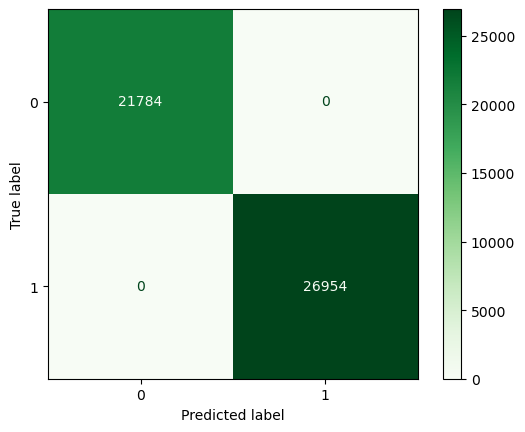

In [ ]:
# plot confussion matrix train set
display_cm(pipe_rf, X_train_capped, y_train)

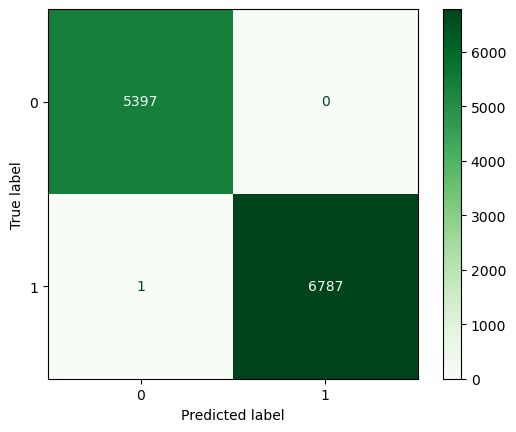

In [ ]:
# plot confussion matrix test set
display_cm(pipe_rf, X_test_capped, y_test)

Selain menggunakan metric Recall score, model juga akan diukur hasilnya menggunakan ROC AUC score untuk mengetahui seberapa baik model dalam membedakan kelas.

In [ ]:
# membuat fungsi menghitung auc score
def auc_score(model, X_test, y_test):

    y_pred_proba = model.predict_proba(X_test)[:,1]
    auc_score =   roc_auc_score(y_test, y_pred_proba)

    return auc_score

In [ ]:
# auc score pada model random forest default
print('ROC AUC Score -  Test set', auc_score(pipe_rf, X_test_capped, y_test))

ROC AUC Score -  Test set 0.9999999044625176


Selanjutnya nama model beserta hasil uji performanya menggunakan metric Recall score dan ROC AUC score disusun di dalam dataframe agar lebih mudah untuk dibandingkan.

In [ ]:
# membuat dataframe dari hasil pengujian untuk perbandingan
result = {
    'Score' : [],
    'Recall - Train' : [],
    'Recall - Test' : [],
    'AUC Score' : []
}

def evaluation_table(title, model, X_train, X_test, y_train, y_test): 
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # menentukan recall score
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)

    # menentukan auc score
    y_pred_proba = model.predict_proba(X_test)[:,1]
    auc_score =   roc_auc_score(y_test, y_pred_proba)

    # memasukkan hasil perhitungan ke dalam list
    result['Score'].append(title)
    result['Recall - Train'].append(round(recall_train, 5))
    result['Recall - Test'].append(round(recall_test, 5))
    result['AUC Score'].append(round(auc_score, 5))

In [ ]:
evaluation_table('Random Forest Classifier (default)', pipe_rf, X_train_capped, X_test_capped, y_train, y_test)
table = pd.DataFrame(result)
table.set_index('Score').T

Score,Random Forest Classifier (default)
Recall - Train,1.00000
Recall - Test,0.99985
AUC Score,1.00000


## Hyperparamater Tuning - Training

Seperti yang sudah saya katakan sebelumnya, hasil dari model terbaik akan melalui proses Hyperparameter Tuning untuk dilakukan perbandingan manakah model dengan performa terbaik, apakah model default atau model tuned. Parameter akan dipilih secara random menggunakan `RandomizedSearchCV`. Berikut parameter-parameter yang akan dites.

In [ ]:
# menentukan parameter yang akan diuji secara random
param_dist = {
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'randomforestclassifier__max_depth': [None, 5, 12, 16],
    'randomforestclassifier__min_samples_split': [2, 12, 20, 31],
    'randomforestclassifier__min_samples_leaf': [1, 5, 11],
    'randomforestclassifier__max_leaf_nodes': [None, 5, 10, 20],
    'randomforestclassifier__class_weight': [None, 'balanced'],
    'randomforestclassifier__n_estimators': [100, 200, 300],  
    'randomforestclassifier__bootstrap': [True, False]
}

# menyiapkan RandomizedSearchCV object untuk Random Forest classifier
random_search = RandomizedSearchCV(pipe_rf,
                                   param_distributions=param_dist,
                                   scoring='recall',
                                   cv=skfold,
                                   n_jobs=-1,
                                   n_iter=30,
                                   random_state=11)

# melatih model dengan Train set
random_search.fit(X_train_capped, y_train)

# Parameter terbaik untuk Random Forest classifier
print('Hyperparameter terbaik pada Random Forest Classifier:', random_search.best_params_)

#  recall score terbaik Random Forest classifier
print('Recall score terbaik pada Random Forest Classifier:', random_search.best_score_)

# menyimpan best model dalam variable
best_rf_model = random_search.best_estimator_

Hyperparameter terbaik pada Decision tree Classifier: {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 20, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_leaf_nodes': None, 'randomforestclassifier__max_depth': None, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__class_weight': None, 'randomforestclassifier__bootstrap': True}
Recall score terbaik pada Decision tree Classifier: 0.9998516045260619


Diketahui parameter pengujian yang terpilih dari `RandomizedSearchCV` yang terbaik adalah:
- n_estimator       : 200
- min_samples_split : 20
- min_samples_leaf  : 1
- max_leaf_nodes    : None
- max_depth         : None
- criterion         : 'entropy'
- class_weight      : None
- bootstrap         : True

dengan Recall score terbaik sebesar 0.9998516045260619

## Hyperparamater Tuning - Evaluation

In [ ]:
# recall score best model decision tree classifier
print('Recall Score - Train Set:', recall_performance(best_rf_model, X_train_capped, y_train))
print('Recall Score - Test Set:', recall_performance(best_rf_model, X_test_capped, y_test))

Recall Score - Train Set: 0.9999628997551384
Recall Score - Test Set: 0.9998526812021213


Setelah dilakukan Hyperparameter Tuning, model menghasilkan Recall score yang tidak jauh berbeda dengan performa default. Recall score pada train set dan test set masih terbilang tinggi dengan angka 0.9999628997551384 dan 0.9998526812021213. Selain itu, akan ditampilkan juga Confussion Matrixnya dalam bentuk plot diikuti dengan AUC score.

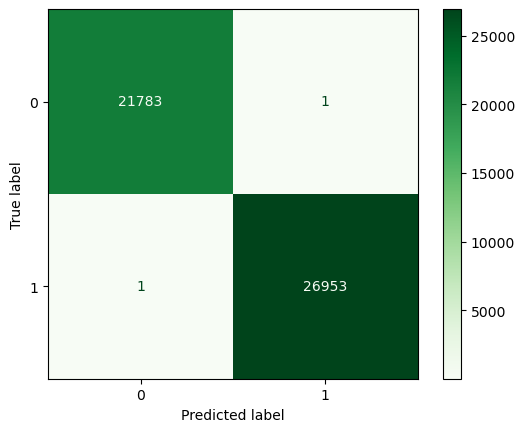

In [ ]:
# plot confussion matrix train set
display_cm(best_rf_model, X_train_capped, y_train)

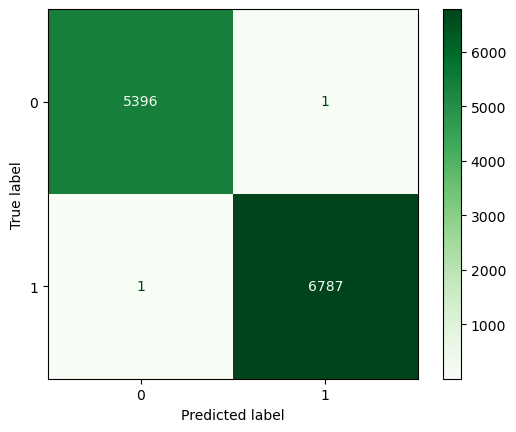

In [ ]:
# plot confussion matrix test set
display_cm(best_rf_model, X_test_capped, y_test)

In [ ]:
# auc score pada model random forest best model
print('ROC AUC Score -  Test set', auc_score(best_rf_model, X_test_capped, y_test))

ROC AUC Score -  Test set 0.9999999181107294


Untuk membandingkan AUC score dari kedua model, maka akan dibuatkan fungsi grafiknya.

In [ ]:
# membuat fungsi roc curve
def roc_curve_graph(model1, model2, X_test, y_test, model1_name, model2_name):
    y_pred_proba_model1 = model1.predict_proba(X_test)[:,1]
    y_pred_proba_model2 = model2.predict_proba(X_test)[:,1]

    # menghitung nilai fpr(false positive rate) dan tpr(true positive rate)
    fpr_model1, tpr_model1, _ = roc_curve(y_test, y_pred_proba_model1)
    fpr_model2, tpr_model2, _ = roc_curve(y_test, y_pred_proba_model2)

    # membuat plot
    plt.figure(0).clf()
    plt.plot(fpr_model1, tpr_model1, label=model1_name)
    plt.plot(fpr_model2, tpr_model2, label=model2_name)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc=0)

    plt.show()

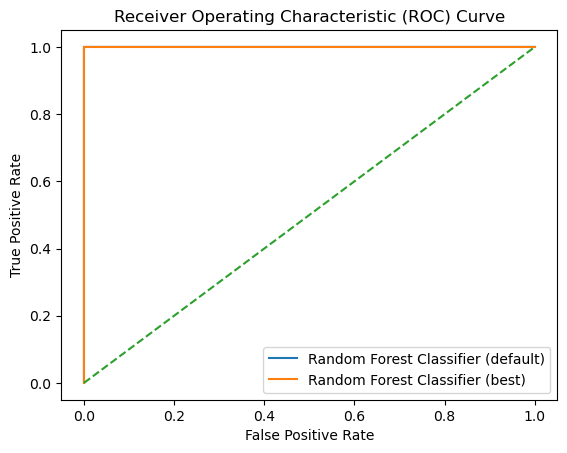

In [ ]:
roc_curve_graph(pipe_rf, best_rf_model, X_test_capped, y_test, 'Random Forest Classifier (default)', 'Random Forest Classifier (best)')

Karena kedua model memiliki nilai AUC score yang serupa, pada grafik, tidak nampak perbedaan dari kedua garisnya, bahkan terlihat saling bertumpuk.

In [ ]:
# menampilkan performa model dalam bentuk dataframe
evaluation_table('Random Forest Classifier (best)', best_rf_model, X_train_capped, X_test_capped, y_train, y_test)
table = pd.DataFrame(result)
table.set_index('Score').T

Score,Random Forest Classifier (default),Random Forest Classifier (best)
Recall - Train,1.00000,0.99996
Recall - Test,0.99985,0.99985
AUC Score,1.00000,1.00000


Berikut adalah penampakan perbandingan performa Recall score dan AUC score dari kedua model Random Forest default dan Random Forest tuned. Keduanya memiliki score yang sangat mirip. Bisa dikatakan yang berbeda hanya Recall score train set dimana pada model default memiliki Recall score sempurna, yakni 1 dan model best 0.99996. Kedua model memiliki performa sangat baik hanya saja saya memutuskan untuk menjadikan Random Forest tuned sebagai model yang akan digunakan pada data inference dengan asumsi model `Best-Fit` karena memiliki selisih score pada train dan test set paling sedikit.

## ix. Model Saving

In [ ]:
# menyimpan best model
with open('best_rf_model.pkl', 'wb') as model_file:
  pickle.dump(best_rf_model, model_file)

## x. Model Inference

Model Inference akan dilakukan pada notebook berbeda, yaitu `P1M2_hafizal_shakur_inf.ipynb`

## xi. Conclusion

Beberapa hal yang bisa disimpulkan dalam pengerjaan project ini dari awal. Pertama-tama saya menyadari bahwa dataset yang saya dapatkan masih terbilang cukup kotor. Saya melakukan penggantian nama kolom dan juga value pada tiap cell. Selain itu, pada feature engineering, saya melakukan handling outliers dengan winsorizer dan imputasi pada missing value. Namun untuk variabel yang memiliki missing value lebih dari 80%, saya putuskan untuk di drop.

Selanjutnya diberikan 5 kandidat model yang akan dicari model terbaiknya berdasarkan Recall score untuk melakukan model inference. Kelima model tersebut diuji menggunakan Cross Vaalidation yang mengasilkan Random Forest Classifier menjadi model dengan score tertinggi. Kemudian model tersebut diterapkan Hyperparameter Tuning untuk dibandingkan kembali mana model yang lebih baik.

Hasil Recall score dari kedua model tersebut sangat baik. Namun, metode Hyperparameter Tuning mengubah model tersebut menjadi lebih baik dan menjadikannya `Best-fit` jika dibandingkan dengan model Random Forest default.